In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
import numpy as np

In [5]:
from collections import defaultdict

#### Bradley-Terry（BT）模型

In [2]:
import choix

# 假设共有4张图
# 每一项是一个比较(winner,loser)

comparisons = [
    (0,1),(0,2),(3,0),
    (2,1),(1,3),(2,3)
]

# 拟合BT模型,返回每张图的能力值
scores = choix.ilsr_pairwise(n_items = 4,data = comparisons)
scores

array([ 0.54930614, -0.54930614,  0.54930614, -0.54930614])

In [15]:
df_vote = pd.read_csv('/Users/zhaojunran/Documents/Python_Urban_Perception_and_Visual_Character/MIT_Place_Pulse_archive/votes_clean.csv')
df_vote = df_vote.sample(100)

def compute_bt_scores(df_votes,max_iter=1000,tol=1e-6): # tol：收敛阈值，默认值为 1e-6
    
    # 初始化能力值,所有图片初始值为1.0 | 注意不能为0
    items = set(df_votes['left']).union(set(df_votes['right']))
    # set(df_votes['right']) 的作用是从 df_votes 数据框的 right 列中提取所有不同的元素，并将这些元素存储在一个集合（set）
    # 从 df_votes 的 'left' 列和 'right' 列中提取所有不同的元素，合并后得到一个集合 items
    # 这些元素代表参与投票的所有图片
    pi = {item:1.0 for item in items}
    # 创建一个字典 pi，键为 items 集合中的每个元素（即每张图片），值初始化为 1.0
    # 这个字典用于存储每张图片的能力值

    for iteration in range(max_iter): # 开始一个循环，循环次数最多为 max_iter 次
        pi_old = pi.copy()
        numerators = defaultdict(float)
        denominators = defaultdict(float)
        # 创建两个默认字典 numerators 和 denominators，默认值为浮点数 0.0
        # numerators 用于存储每个图片的分子值
        # denominators 用于存储每个图片的分母值

        for _,row in df_vote.iterrows():  # 遍历 df_votes 中的每一行
            
            A = row['left']
            B = row['right']
            choice = row['choice']
            
            # 从能力值字典 pi 中获取图片 A 和 B 的当前能力值
            pi_A = pi[A]
            pi_B = pi[B]
            denom = pi_A + pi_B  # 计算分母，即图片 A 和 B 的能力值之和

            if choice == 'left':
                numerators[A] += 1
            else:
                numerators[B] += 1
            # 根据投票选择，如果选择了 'left'，则图片 A 的分子值加 1；否则图片 B 的分子值加 1

            denominators[A] += 1/denom
            denominators[A] += 1/denom
            # 图片 A 和 B 的分母值都加上 1 除以分母的值

        # 更新每个item的能力值
        for item in pi:
            if denominators[item] > 0:
                pi[item] = numerators[item]/denominators[item]
                # 对于每个图片，如果其分母值大于 0，则更新其能力值为分子值除以分母值

        # 计算迭代前后能力值的最大差异
        diff = max(abs(pi[item] - pi_old[item]) for item in pi)

        if diff < tol:
            print(f'收敛于第{iteration + 1}次迭代')
            break
            # 如果最大差异小于收敛阈值 tol，则打印收敛信息并跳出循环
    
    return pi
    
pi = compute_bt_scores(df_vote)
pi

收敛于第2次迭代


{'50f5eb24fdc9f065f000804d': 1.0,
 '5140c934fdc9f0492600247d': 1.0,
 '51414d8bfdc9f04926007602': 1.0,
 '513ccf22fdc9f03587001dc3': 1.0,
 '513d68eefdc9f0358700454d': 1.0,
 '513e6c97fdc9f0358700c1ae': 1.0,
 '50f46455fdc9f065f00045b8': 1.0,
 '50f5612efdc9f065f000550c': 1.0,
 '50f4347efdc9f065f000289a': 1.0,
 '513e62c8fdc9f0358700b74a': 0.0,
 '50f5ead5fdc9f065f0007dbf': 1.0,
 '50f5e58efdc9f065f0006a00': 0.0,
 '5141393ffdc9f04926005408': 1.0,
 '513f329ffdc9f0358700e0b3': 1.0,
 '5140b70efdc9f049260018c8': 1.0,
 '50f42c47fdc9f065f00019ff': 1.0,
 '5141497ffdc9f04926006deb': 1.0,
 '5140d7ddfdc9f049260038cd': 1.0,
 '50f5e76bfdc9f065f0007187': 0.0,
 '51413cc8fdc9f04926005bc5': 0.0,
 '513d68f6fdc9f03587004568': 1.0,
 '513cba3cfdc9f03587000db4': 1.0,
 '514150c0fdc9f04926007e17': 1.0,
 '51409c2cfdc9f04926001172': 1.0,
 '51414142fdc9f04926006184': 1.0,
 '513d5c99fdc9f0358700374e': 1.0,
 '50f60b92beb2fed9100000b6': 0.0,
 '513d609bfdc9f03587003d3f': 0.0,
 '513e1cfbfdc9f035870098a4': 1.0,
 '513e5d97fdc9

In [16]:
pi_copy = pd.DataFrame.from_dict(pi,orient = 'index')

In [18]:
pi_copy = pi_copy.reset_index()

In [21]:
pi_copy = pi_copy.rename(columns = {'index':'place_id','0':'value'})

In [22]:
pi_copy.head()

,place_id,0
0,50f5eb24fdc9f065f000804d,1.0
1,5140c934fdc9f0492600247d,1.0
2,51414d8bfdc9f04926007602,1.0
3,513ccf22fdc9f03587001dc3,1.0
4,513d68eefdc9f0358700454d,1.0


In [24]:
pi_copy.to_csv('Bradley_Terry_sample_100.csv')

### machine learning models

In [27]:
image_data = pd.read_csv('imgs_data.csv')
image_data.head()

,Unnamed: 0,cluster_centers_rgb,color_ratios_raw,cluster_centers_hsv,matched_colors_raw,matched_colors,color_ratios_matched,filename,h_mean,h_std,s_mean,v_mean,v_max,place_id,simple_score,elo_score
0,0,[[153 160 165]\n [ 22 80 129]\n [127 123 111]...,[0.34035833 0.03794167 0.32735833 0.1571 0...,"[array([103, 19, 165], dtype=uint8), array([1...","['gray', 'cyan', 'orange', 'gray', 'yellow']","['gray', 'cyan', 'orange', 'yellow']","[np.float64(0.49745833333333334), np.float64(0...",51415142fdc9f04926007f43.jpg,59.777342,42.281507,43.972375,146.078017,255,51415142fdc9f04926007f43,0.000000,968.956512
1,1,[[ 36 35 26]\n [171 174 177]\n [ 93 96 66]...,[0.27780833 0.1731 0.21171667 0.1403 0...,"[array([27, 71, 36], dtype=uint8), array([105,...","['yellow', 'gray', 'yellow', 'orange', 'yellow']","['yellow', 'gray', 'orange']","[np.float64(0.6866), np.float64(0.1731), np.fl...",50f5ed9afdc9f065f0008e32.jpg,44.728267,37.648842,62.034000,94.703683,255,50f5ed9afdc9f065f0008e32,0.500000,996.751165
2,2,[[153 148 121]\n [ 53 54 32]\n [214 215 209]...,[0.202775 0.20121667 0.1415 0.24424167 0...,"[array([ 25, 53, 153], dtype=uint8), array([ ...","['yellow', 'yellow', 'white', 'cyan', 'yellow']","['yellow', 'white', 'cyan']","[np.float64(0.6142583333333334), np.float64(0....",513e6050fdc9f0358700b395.jpg,52.645892,38.345215,70.778133,143.088600,255,513e6050fdc9f0358700b395,0.692308,1081.661041
3,3,[[ 68 72 69]\n [204 205 204]\n [157 159 158]...,[0.24099167 0.27510833 0.28238333 0.09298333 0...,"[array([68, 14, 72], dtype=uint8), array([ 60,...","['gray', 'white', 'gray', 'gray', 'yellow']","['gray', 'white', 'yellow']","[np.float64(0.6163583333333332), np.float64(0....",50f5eb28fdc9f065f0008096.jpg,59.708800,44.573643,29.268692,136.006450,255,50f5eb28fdc9f065f0008096,0.000000,984.000000
4,4,[[ 52 54 33]\n [143 140 133]\n [203 205 204]...,[0.23179167 0.2211 0.0928 0.12643333 0...,"[array([33, 99, 54], dtype=uint8), array([ 21,...","['yellow', 'gray', 'white', 'gray', 'gray']","['yellow', 'gray', 'white']","[np.float64(0.23179166666666667), np.float64(0...",50f5ec32fdc9f065f00087a7.jpg,46.192183,39.487293,49.982667,126.712392,255,50f5ec32fdc9f065f00087a7,0.250000,925.638091


#### k fold cross validate score

In [42]:
def KFoldValidation(model,X,y,K=5):
    # 设置 5 折交叉验证
    kf = KFold(n_splits = K,shuffle = True,random_state = 42)
    # shuffle = True 意味着在划分数据集之前会对传入的数据集进行打乱操作，以实现随机划分。
    # 如果不设置此参数或者设置为 False，则不会对传入的训练集进行打乱，而是按顺序进行划分，每次运行代码得到的划分结果都一样

    # 使用 RMSE 作为评估指标
    rmse_scorer = make_scorer(mean_squared_error,greater_is_better = False)
    # cross_val_score 函数默认认为得分越高越好，但 RMSE 是越低越好。因此，在使用 make_scorer 函数创建评分器时，需要将 greater_is_better 参数设置为 False

    # 交叉验证评分
    scores = cross_val_score(model,X,y,cv=kf,scoring = rmse_scorer)
    # 这是 scikit-learn 的规范（它假设“越大越好”，所以对“误差越小越好”的指标要取负数）。
    # cv：交叉验证的划分策略，可以是整数（表示默认的 K 折交叉验证），也可以是 KFold 等交叉验证对象，如上述代码中的 kf。
    # scoring：评分函数，可以是字符串（如 'neg_mean_squared_error'）或可调用的评分器对象，如上述代码中的 rmse_scorer。

    print("每一折的 RMSE:", np.sqrt(-scores)) # 这是 scikit-learn 的规范（它假设“越大越好”，所以对“误差越小越好”的指标要取负数）。
    print("平均 RMSE:", np.mean(np.sqrt(-scores))) # 这是 scikit-learn 的规范（它假设“越大越好”，所以对“误差越小越好”的指标要取负数）。

每一折RSE大约在0.0567~0.0573之间

平均RSE约等于0.0570

#### Linear Regression

In [32]:
X = image_data[['h_mean']]
y = image_data['simple_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)

print(f'Intercept : {model.intercept_}')
print(f'Coefficient : {model.coef_[0]}')

Intercept : 0.2929360635122771
Coefficient : 0.0016599270323480154


model.coef_输出的时候是数组

In [29]:
model.coef_

array([0.00165993])

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

absolute_errors = np.abs(y_test - y_pred)
print(f'absolute errors:{absolute_errors}')

squared_errors = (y_test - y_pred) ** 2
print(f'squared errors:{squared_errors}')

mae = np.mean(absolute_errors)
print(f'squared errors:{mae}')

mse = mean_squared_error(y_test,y_pred)
print("mean squared error:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test,y_pred)
print("R²:", r2)

absolute errors:67543    0.078238
81940    0.111575
36605    0.392163
59452    0.042249
24212    0.388818
           ...   
69251    0.332346
28898    0.011728
43396    0.403345
31659    0.142436
86380    0.312226
Name: simple_score, Length: 22138, dtype: float64
squared errors:67543    0.006121
81940    0.012449
36605    0.153792
59452    0.001785
24212    0.151180
           ...   
69251    0.110454
28898    0.000138
43396    0.162687
31659    0.020288
86380    0.097485
Name: simple_score, Length: 22138, dtype: float64
squared errors:0.1974824475899449
mean squared error: 0.0571295451871804
RMSE: 0.2390178762920891
R²: 0.006803589630551055


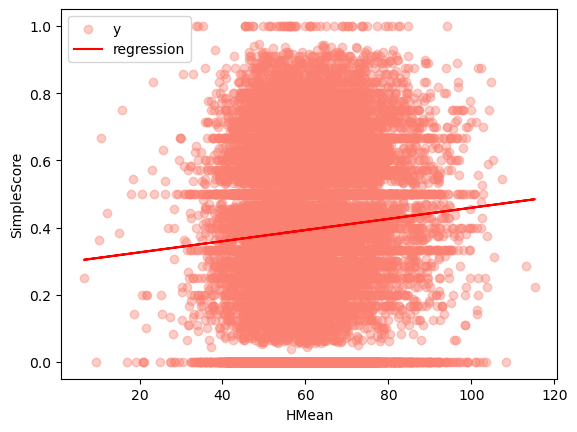

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = 'salmon', alpha = 0.4, label='y')
plt.plot(X_test, y_pred, color='red', label='regression')
plt.xlabel("HMean")
plt.ylabel("SimpleScore")
plt.legend()
plt.show()

In [ ]:
X = image_data[['h_mean','h_std','s_mean',	'v_mean','v_max']]
y = image_data['simple_score']

In [56]:
model = LinearRegression()
KFoldValidation(model = model,X = X,y = y,K = 5)

每一折的 RMSE: [0.23701533 0.236418   0.23663794 0.23571922 0.23648946]
平均 RMSE: 0.23645599114702004


#### Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

X = image_data[['h_mean','h_std','s_mean',	'v_mean','v_max']]
y = image_data['simple_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义随机森林模型
model = RandomForestRegressor(
    n_estimators=100,       # 决策树数量
    max_depth=20,           # 最大树深
    min_samples_split=5,    # 节点最小分裂样本数
    random_state=42         # 可复现性
)
model.fit(X_train, y_train)
# 模型预测
y_pred = model.predict(X_test)

# 模型评估
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.2375891453007337
R²: 0.018641778819422417


In [53]:
model = RandomForestRegressor(
    n_estimators=100,       # 决策树数量
    max_depth=20,           # 最大树深
    min_samples_split=5,    # 节点最小分裂样本数
    random_state=42         # 可复现性
)
KFoldValidation(model = model,X = X,y = y,K = 5)

每一折的 RMSE: [0.23778902 0.2367673  0.23817772 0.23678374 0.23736153]
平均 RMSE: 0.23737586325200502


#### XGBoost

In [57]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  定义 XGBoost 模型
model = XGBRegressor(
    n_estimators=100,        # 弱学习器数量
    max_depth=6,             # 树最大深度
    learning_rate=0.1,       # 学习率
    subsample=0.8,           # 子采样比率
    colsample_bytree=0.8,    # 每棵树用的特征比例
    random_state=42,
    objective="reg:squarederror",  # 回归任务的目标函数（必须！）
    verbosity=0              # 0表示不输出训练过程日志
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost 回归模型评估结果：")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

XGBoost 回归模型评估结果：
RMSE: 0.2359
R²: 0.0322


In [58]:
model = XGBRegressor(
    n_estimators=100,        # 弱学习器数量
    max_depth=6,             # 树最大深度
    learning_rate=0.1,       # 学习率
    subsample=0.8,           # 子采样比率
    colsample_bytree=0.8,    # 每棵树用的特征比例
    random_state=42,
    objective="reg:squarederror",  # 回归任务的目标函数（必须！）
    verbosity=0              # 0表示不输出训练过程日志
)
KFoldValidation(model = model,X = X,y = y,K = 5)

每一折的 RMSE: [0.23603654 0.23525753 0.23584461 0.23477909 0.2353941 ]
平均 RMSE: 0.2354623747593974
